## Applied ML Uni of Michigan - Assignment 1

For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [13]:
import numpy as np
import pandas as pd
import pprint
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()

In [7]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [14]:
pprint.pprint(cancer['DESCR'])

('Breast Cancer Wisconsin (Diagnostic) Database\n'
 '=============================================\n'
 '\n'
 'Notes\n'
 '-----\n'
 'Data Set Characteristics:\n'
 '    :Number of Instances: 569\n'
 '\n'
 '    :Number of Attributes: 30 numeric, predictive attributes and the class\n'
 '\n'
 '    :Attribute Information:\n'
 '        - radius (mean of distances from center to points on the perimeter)\n'
 '        - texture (standard deviation of gray-scale values)\n'
 '        - perimeter\n'
 '        - area\n'
 '        - smoothness (local variation in radius lengths)\n'
 '        - compactness (perimeter^2 / area - 1.0)\n'
 '        - concavity (severity of concave portions of the contour)\n'
 '        - concave points (number of concave portions of the contour)\n'
 '        - symmetry \n'
 '        - fractal dimension ("coastline approximation" - 1)\n'
 '\n'
 '        The mean, standard error, and "worst" or largest (mean of the three\n'
 '        largest values) of these features were c

In [16]:
len(cancer['data']), len(cancer['data'][0])

(569, 30)

#### Question 0 (Example)
How many features does the breast cancer dataset have?

In [25]:
## no of features:
cancer['data'].shape[1]

30

#### Question 1
Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame.

Convert the sklearn.dataset cancer to a DataFrame.

This function should return a (569, 31) DataFrame with

columns =

['mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error', 'fractal dimension error',
'worst radius', 'worst texture', 'worst perimeter', 'worst area',
'worst smoothness', 'worst compactness', 'worst concavity',
'worst concave points', 'worst symmetry', 'worst fractal dimension',
'target']

and index =

RangeIndex(start=0, stop=569, step=1)

In [61]:
all_cols = np.hstack((cancer['data'],cancer['target'][:,np.newaxis]))
all_cols_names = np.append(cancer['feature_names'],'target')
cancer_df = pd.DataFrame(all_cols,columns = all_cols_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


#### Question 2
What is the class distribution? (i.e. how many instances of malignant (encoded 0) and how many benign (encoded 1)?)

In [93]:
# different ways:
cancer_df['target'].value_counts()
cancer_df.groupby('target').agg('count')
cancer_df.groupby('target').size()
pd.crosstab(cancer_df['target'],columns='malignant (1)/ benign (0)')

col_0,malignant (1)/ benign (0)
target,
0.0,212
1.0,357


#### Question 3
Split the DataFrame into X (the data) and y (the labels).

This function should return a tuple of length 2: (X, y), where

X has shape (569, 30)
y has shape (569,).

In [350]:
def split_df(df):
    
    X = cancer_df.iloc[:,:-1]
    y = cancer_df.iloc[:,-1]
    
    return X,y

X,y = split_df(cancer_df)

#additionally normalize Xs:
from sklearn import preprocessing
X_normalized = preprocessing.scale(X)
X_normalized
#np.mean(X_normalized,axis=0)
#(X['mean radius'] - np.mean(X['mean radius']))/np.std(X['mean radius']), X_normalized

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ..., 
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

#### Question 4
Using train_test_split, split X and y into training and test sets (X_train, X_test, y_train, and y_test).

Set the random number generator state to 0 using random_state=0 to make sure your results match the autograder!

This function should return a tuple of length 4: (X_train, X_test, y_train, y_test), where

X_train has shape (426, 30)
X_test has shape (143, 30)
y_train has shape (426,)
y_test has shape (143,)

In [351]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, random_state = 0, test_size = 0.25)

#### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with X_train, y_train and using one nearest neighbor (n_neighbors = 1).

This function should return a  sklearn.neighbors.classification.KNeighborsClassifier.

In [352]:
from  sklearn.neighbors  import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X = X_train, y = y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### Question 6¶
Using your knn classifier, predict the class label using the mean value for each feature.

Hint: You can use cancerdf.mean()[:-1].values.reshape(1, -1) which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier).

This function should return a numpy array either array([ 0.]) or array([ 1.])

In [353]:
means = cancer_df.mean()[:-1].values.reshape(1, -1)
knn.predict(means)

array([ 0.])

#### Question 7
Using your knn classifier, predict the class labels for the test set X_test.

This function should return a numpy array with shape (143,) and values either 0.0 or 1.0.

In [354]:
prediction = knn.predict(X_test)
prediction

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
        0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.])

#### Question 8
Find the score (mean accuracy) of your knn classifier using X_test and y_test.

This function should return a float between 0 and 1

In [355]:
accuracy = knn.score(X_test, y_test)
accuracy

0.94405594405594406

In [356]:
### additional metrics - confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,prediction)

In [357]:
conf_matrix

array([[49,  4],
       [ 4, 86]], dtype=int64)

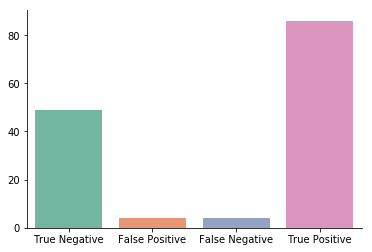

In [364]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['True Negative','False Positive','False Negative','True Positive']
fig, ax = plt.subplots()
ax = sns.barplot(labels,conf_matrix.flatten(),palette="Set2",label = labels)
sns.despine()
plt.show()

In [359]:
precision = conf_matrix[-1][-1]/np.sum(conf_matrix,axis=0)[1]

In [360]:
recall = conf_matrix[-1][-1]/np.sum(conf_matrix,axis=1)[1]

In [363]:
print('precision equals: {:.1%}\nrecall equals: {:.1%}, \n\nwhat indicates that predition as prone\n'
      'to type I error as to type II error - it is as probable to falsely predict malignant cancer\n' 
      'as classify cancer as bening when in fact it is malignant.'.format(precision, recall))

precision equals: 95.6%
recall equals: 95.6%, 

what indicates that predition as prone
to type I error as to type II error - it is as probable to falsely predict malignant cancer
as classify cancer as bening when in fact it is malignant.


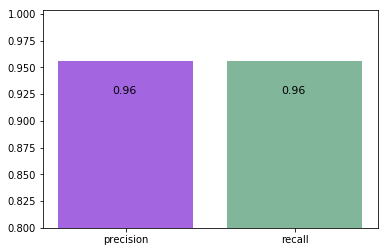

In [362]:
fig, ax = plt.subplots()
ax.bar(['precision','recall'],height=[precision,recall],color = ['#6600cc','#2d8659'],alpha =0.6)
ax.set_ylim(0.8)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.32, i.get_height()-0.03, \
            str(round((i.get_height()), 2)), fontsize=11,
                rotation=0)
plt.show()